In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Question (a)**

In [2]:
df = pd.read_csv('data/real_estate.csv')

In [3]:
data = df.dropna()

In [4]:
print("Indices removed: ")
for idx in df.index:
    if idx not in data.index:
        print(idx)

Indices removed: 
19
41
109
144
230
301


In [9]:
features = ['age', 'nearestMRT', 'nConvenience']
X = data[features].to_numpy()
y = data['price'].to_numpy()

**Question (b)**

In [10]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

**Question (c)**

In [11]:
X_train, X_test = X[:len(X)//2], X[len(X)//2:]
y_train, y_test = y[:len(y)//2], y[len(y)//2:]

In [12]:
print(f"X_train: {X_train[-1]}, X_test: {X_test[-1]}")
print(f"y_train: {y_train[-1]}, y_test: {y_test[-1]}")

X_train: [0.87899543 0.09926012 0.3       ], X_test: [0.14840183 0.0103754  0.9       ]
y_train: 34.2, y_test: 63.9


In [13]:
X_train = np.insert(X_train, 0, np.ones((1, len(X_train))), axis=1)

**Question (d)**

From the question, we have the loss function:

$\mathcal{L}_c(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n \left[ \sqrt{\frac{1}{c^2} (y^{(i)} - \langle w^{(t)}, X^{(i)} \rangle)^2 + 1} - 1\right]$

Also, we are given that $\mathcal{L}_c(y^{(i)}, \hat{y}^{(i)}) =  \sqrt{\frac{1}{c^2} (y^{(i)} - \langle w^{(t)}, X^{(i)} \rangle)^2 + 1} - 1$



So, for $y^{(i)}$ and $w_{k}$, we can find

$\displaystyle \frac{\partial \mathcal{L}_c(y^{(i)}, \hat{y}^{(i)})}{\partial w_{k}} = \frac{2 (- X^{(i)}_k) (y^{(i)} - \langle w^{(t)}, X^{(i)} \rangle)}{2 c^2 \sqrt{\frac{1}{c^2} (y^{(i)} - \langle w^{(t)}, X^{(i)} \rangle)^2 + 1}}$ 

$\displaystyle = \frac{ X^{(i)}_k (\langle w^{(t)}, X^{(i)} \rangle - y^{(i)})}{c^2 \sqrt{\frac{1}{c^2} (y^{(i)} - \langle w^{(t)}, X^{(i)} \rangle)^2 + 1}}$ 

where $k = 0, 1, 2, 3$.

**Question (e)**

**Procedure: Gradient Descent**: \
for $t = 0$ to $t$: \
&nbsp; for $i = 0$ to $n$: \
&nbsp;&nbsp; for $k = 0$ to $3$: \
&nbsp;&nbsp;&nbsp; $w^{(t)}_k \gets w^{(t)}_k + \eta \cdot \nabla \mathcal{L}^{(t)}_c$

**Question (f)**

In [14]:
def nabla(w, X, y):
    numer = (X.T * (X @ w - y))
    denom = np.sqrt((X @ w - y)**2 + 4)
    return np.mean(1/2 * numer/denom, axis=1)

In [15]:
def loss(w, X, y):
    loss = np.mean(np.sqrt(1/4 * (y - X @ w)**2 + 1) - 1)
    return loss

In [16]:
def gd(T, lr, X, y):
    weights = [np.array([1, 1, 1, 1])]*T
    losses = [0]*T
    for t in range(T):
        weights[t] = weights[t-1] - lr*nabla(weights[t-1], X, y)
        losses[t] = loss(weights[t], X, y)
    
    return weights, losses

In [17]:
nIter = 400
alphas = [10,5,2, 1,0.5, 0.25,0.1, 0.05, 0.01]

losses = [0]*nIter
for i, a in enumerate(alphas):
    w, losses[i]  = gd(nIter, a, X_train, y_train)

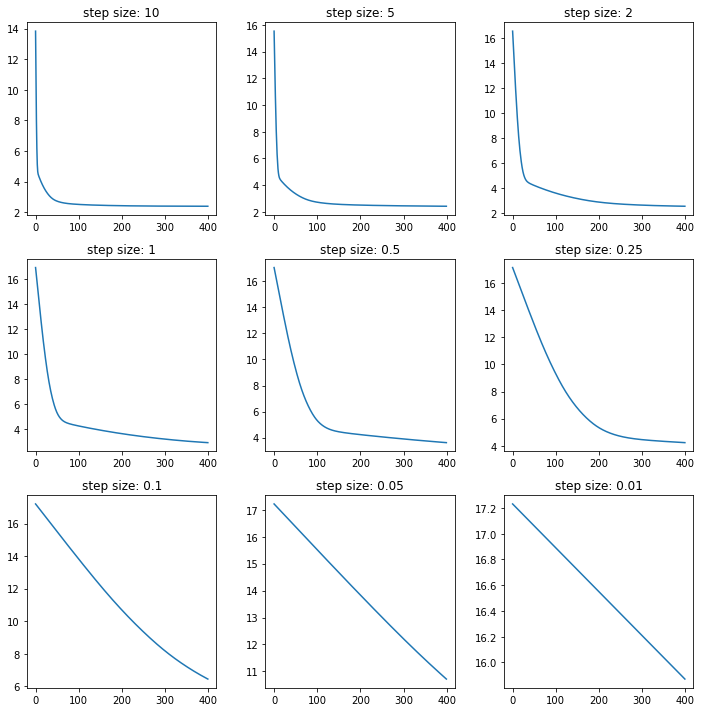

In [18]:
fig, ax = plt.subplots(3,3, figsize=(10,10))
for i, ax in enumerate(ax.flat):
    # that particular step size
    ax.plot(losses[i])
    ax.set_title(f"step size: {alphas[i]}")
plt.tight_layout()
# plot formatting
plt.show()

**Question (g)**


The optimal step size seems to be 10. 

**Question (h)**


In [19]:
eta = 0.3
w, losses = gd(nIter, eta, X_train, y_train)

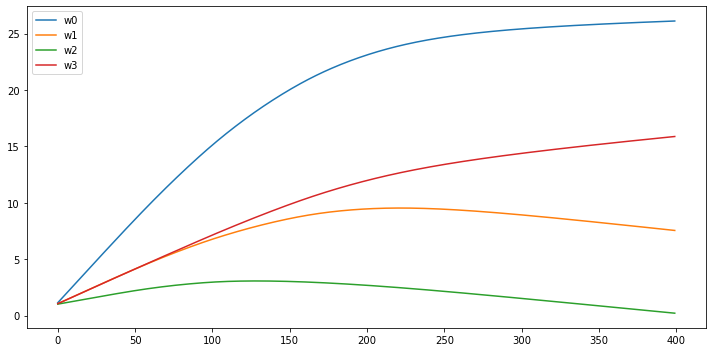

In [20]:
plt.figure(figsize=(10, 5))
w = np.array(w)
    # that particular step size
for i in range(len(w[0])):
    plt.plot(w[:,i], label=f"w{i}")
    
plt.legend()
plt.tight_layout()
# plot formatting
plt.show()

**Question (i)**

In [21]:
def nabla_s(w, X, y):
    numer = (X @ w - y)
    denom = 4*np.sqrt(1 + 1/4 * (X @ w - y)**2)
    return (numer/denom)*X

In [22]:
def sgd(T, lr, X, y):
    weights = [np.array([1, 1, 1, 1])]*T
    losses = [0]*T
    for t in range(T):
        weights[t] = weights[t-1] - lr*nabla_s(weights[t-1], X[t%len(X)], y[t%len(y)])
        losses[t] = loss(weights[t], X, y)
    
    return weights, losses

In [23]:
nIter = 1250
alphas = [10,5,2, 1,0.5, 0.25,0.1, 0.05, 0.01]

losses = [0]*nIter
for i, a in enumerate(alphas):
    w, losses[i]  = sgd(nIter, a, X_train, y_train)

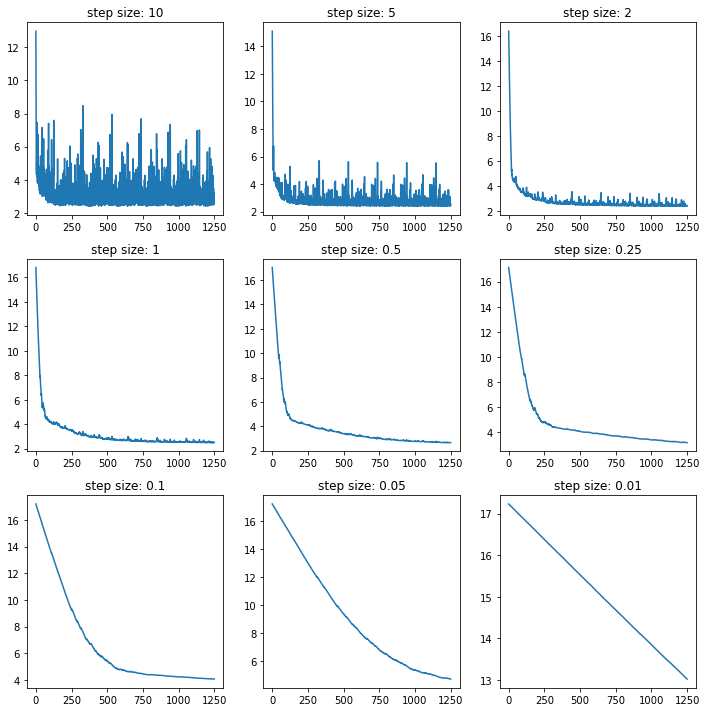

In [24]:
fig, ax = plt.subplots(3,3, figsize=(10,10))
for i, ax in enumerate(ax.flat):
    # that particular step size
    ax.plot(losses[i])
    ax.set_title(f"step size: {alphas[i]}")
plt.tight_layout()
# plot formatting
plt.show()

**Question (j)**

The appropriate choice is around ~0.25, as i t has one of the most stable curves and seems to reach a global minimum.

**Question (k)**

In [25]:
weights, losses = sgd(nIter, 0.4, X_train, y_train)

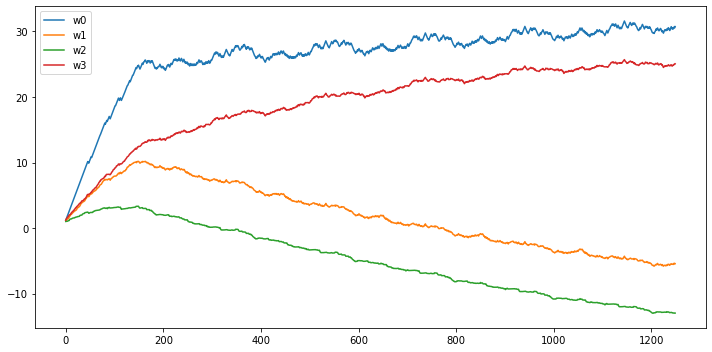

In [26]:
plt.figure(figsize=(10, 5))
w = np.array(weights)
for i in range(len(w[0])):
    plt.plot(w[:,i], label=f"w{i}")
    
plt.legend()
plt.tight_layout()
# plot formatting
plt.show()

**Question (l)**

The step size in GD impacts the possible rate of convergence. A step size which is too large may cause oversearching or jumps of a size which is too large.

We can see this in SGD, where the step size impacts the possible rate of convergence and also the 'smoothness' of the convergence. We can see that when the step size is too large, the loss jumps in an erratic manner. 